   # RATE PREDICTION OF ETHER CRYPTOCURRENCY

In [1]:
%matplotlib inline
import random
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go
import time
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
url='https://etherchain.org/api/statistics/price'
#Access data from ether_table.csvr api tool
resp=requests.get(url)
# getting data in json format
data=json.loads(resp.text)
data.keys()

dict_keys(['status', 'data'])

In [3]:
#GET DATA IN READABLE AND UNDERSTANDABLE FORMAT
data

{'data': [{'time': '2015-08-30T07:56:28.000Z', 'usd': 1.17},
  {'time': '2015-08-30T08:56:28.000Z', 'usd': 1.27},
  {'time': '2015-08-30T09:56:28.000Z', 'usd': 1.28},
  {'time': '2015-08-30T10:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T11:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T12:56:28.000Z', 'usd': 1.33},
  {'time': '2015-08-30T13:56:28.000Z', 'usd': 1.33},
  {'time': '2015-08-30T14:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T15:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T16:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T17:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T18:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T19:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T20:56:28.000Z', 'usd': 1.29},
  {'time': '2015-08-30T21:56:28.000Z', 'usd': 1.31},
  {'time': '2015-08-30T22:56:28.000Z', 'usd': 1.31},
  {'time': '2015-08-30T23:56:28.000Z', 'usd': 1.31},
  {'time': '2015-08-31T00:56:28.000Z', 'usd': 1.31},
  {'time': '2015-08-31T01:56:28.000Z',

In [4]:
#GET NUMBER OF DATA VALUES TO ANALYSE
len(data[u'data'])

17834

In [5]:
#Making normalized table of the required content from the json string
data_table=json_normalize(data[u'data'])

#PRINT FIRST 4 VALUES OF TABLE
data_table.head()

,time,usd
0,2015-08-30T07:56:28.000Z,1.17
1,2015-08-30T08:56:28.000Z,1.27
2,2015-08-30T09:56:28.000Z,1.28
3,2015-08-30T10:56:28.000Z,1.29
4,2015-08-30T11:56:28.000Z,1.29


In [6]:
# WRITE DATA INTO CSV FILE IN DESKTOP DIRECTORY
data_table.to_csv('~/Documents/ether_table.csv')
data_table.head()
data_table['time'].dtypes

dtype('O')

In [7]:
#GET DATATYPES OF THE data_table MADE
data_table.dtypes

#MAKE GRAPH FROM THE DATA RETRIEVED TO DECIDE WHICH ALGORITHM TO BE USED
trace1 = go.Scatter(
                    x=data_table['time'], y=data_table['usd'], # Data
                    mode='lines', name='time' # Additional options
                   )
layout = go.Layout(title='Ether rate in usd over time',
                   plot_bgcolor='rgb(230, 230,230)')

fig = go.Figure(data=[trace1], layout=layout)

#PLOT THE GRAPH IN IFRAME,OTHERWISE IT WOULD OPEN IN NEW BROWSER WITH PLOT(fig)
iplot(fig)

In [8]:
#CONVERTING THE DATE-TIME DATA INTO SPECIFIC FORMAT

'''One way to slice the time but complecxity is too high'''
#import string
# data_table['time'][1][-1]
# for i in range(0,len(data_table['time'])):
#     if str(data_table['time'][i]).endswith('Z'):
#         data_table['time'][i] = data_table['time'][i][:10]

'''Another method to slice the time with complexity very low'''
pd_data_table = pd.DataFrame(data_table)
data_table['time'] = pd_data_table.time.str[:10]



#PRINT THE NEW data_table WITH NEW TIME FORMAT        
data_table.head()

,time,usd
0,2015-08-30,1.17
1,2015-08-30,1.27
2,2015-08-30,1.28
3,2015-08-30,1.29
4,2015-08-30,1.29


In [10]:
#MERGE THE ROWS WITH SAME DATE AND FIND THE FOLLOWING
#CALCULATE MEDIAN FOR EACH DAY
col_median=data_table.groupby('time', as_index=False).median()
#RENAMING THE COLUMN NAME
col_median.columns = ['time', 'median']
#PRINT FIRST 5 VALUES TO CHECK 
col_median.head()

,time,median
0,2015-08-30,1.290
1,2015-08-31,1.310
2,2015-09-01,1.315
3,2015-09-02,1.360
4,2015-09-03,1.300


In [11]:
#CALCULATE MEAN AND GROUP THEM
col_mean=data_table.groupby('time', as_index=False).mean()
#CHANGE NAME
col_mean.columns = ['time', 'mean']
#PRINT 5 VALUES TO CHECK
col_mean.head()

,time,mean
0,2015-08-30,1.289412
1,2015-08-31,1.247083
2,2015-09-01,1.330833
3,2015-09-02,1.336667
4,2015-09-03,1.278333


In [14]:
#SUM FOR EACH DAY
col_sum = data_table.groupby('time', as_index = False).sum()
#RENAME THE COLUMN
col_sum.columns = ['time', 'sum']
#PRINT 5 VALUES TO CHECK 
col_sum.head()

,time,sum
0,2015-08-30,21.92
1,2015-08-31,29.93
2,2015-09-01,31.94
3,2015-09-02,32.08
4,2015-09-03,30.68


In [15]:
#MERGING ALL THREE TABLES WITH 'time' AS KEY
left = pd.DataFrame(col_mean)
middle = pd.DataFrame(col_median)
right = pd.DataFrame(col_sum)
half_final = pd.merge(left, middle, on = 'time')
final_table = pd.merge(half_final, right, on = 'time')
#PRINT 5 VALUES TO CHECK
final_table.head()

,time,mean,median,sum
0,2015-08-30,1.289412,1.290,21.92
1,2015-08-31,1.247083,1.310,29.93
2,2015-09-01,1.330833,1.315,31.94
3,2015-09-02,1.336667,1.360,32.08
4,2015-09-03,1.278333,1.300,30.68


In [16]:
#CONVERT final_table INTO MATRIX TO MAKE EASILY USABLE FOR ALGORITHM
data_mat=np.matrix(final_table)
data_mat

matrix([['2015-08-30', 1.2894117647058818, 1.29, 21.91999999999999],
        ['2015-08-31', 1.247083333333333, 1.31, 29.929999999999993],
        ['2015-09-01', 1.3308333333333338, 1.315, 31.940000000000012],
        ..., 
        ['2017-09-11', 297.4316666666667, 297.5, 7138.360000000001],
        ['2017-09-12', 302.91791666666666, 303.275, 7270.03],
        ['2017-09-13', 276.40470588235297, 276.76, 4698.88]], dtype=object)

In [17]:
#DECLARING THE DATAFRAMES
global df_input, counter
df_input = pd.DataFrame(columns=['mean 1', 'median 1', 'mean 2','median 2', 'mean 3', 'median 3'])
global df_output
df_output = pd.DataFrame(columns=['output_mean'])

#CALCULATING THE DATA FRAMES
for counter in range(0,len(final_table)-3):
    b=[]
    for i in range(counter,counter+3):
        for j in range(1,3):
            b.append(final_table.iloc[i][j])
    global df_input, df_output
    df_input = df_input.append({'mean 1':b[0], 'median 1':b[1],'mean 2':b[2], 'median 2':b[3],'mean 3':b[4], 'median 3':b[5]}, ignore_index=True)
    df_output = df_output.append({'output_mean':final_table.iloc[counter+3][1]}, ignore_index=True)
df_input.head()

,mean 1,median 1,mean 2,median 2,mean 3,median 3
0,1.289412,1.290,1.247083,1.310,1.330833,1.315
1,1.247083,1.310,1.330833,1.315,1.336667,1.360
2,1.330833,1.315,1.336667,1.360,1.278333,1.300
3,1.336667,1.360,1.278333,1.300,1.230417,1.230
4,1.278333,1.300,1.230417,1.230,1.344167,1.370


In [18]:
df_output.head()

,output_mean
0,1.336667
1,1.278333
2,1.230417
3,1.344167
4,1.361250


In [20]:
#SUPPORT VECTOR MACHINE ALGORITHM IMPLEMENTATION
df_input=np.log1p(df_input)
df_output=np.log1p(df_output)
trainlen=int(0.7*df_input.shape[0])
train_x=df_input.loc[:trainlen]
train_y=df_output.loc[:trainlen]
test_x=df_input.loc[trainlen:]
test_y=df_output.loc[trainlen:]

In [21]:
df_input.iloc[595]

mean 1      1.591440
median 1    1.591584
mean 2      1.590121
median 2    1.590501
mean 3      1.596034
median 3    1.595052
Name: 595, dtype: float64

In [32]:
import sklearn as sk
from sklearn import svm
from sklearn.svm import SVR
clf=svm.SVR()
clf.fit(train_x,train_y)
print('Prediction accuracy is:',clf.score(test_x,test_y)*100*(-1))

Prediction accuracy is: 342.107276558


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [34]:
#LINEAR REGRESSION ALGORITHM IMPLEMENTATION
from sklearn import linear_model
tlen=int(0.8*df_input.shape[0])
trainx=df_input.loc[:tlen]
trainy=df_output.loc[:tlen]
testx=df_input.loc[tlen:]
testy=df_output.loc[tlen:]
regr=linear_model.LinearRegression()
regr.fit(trainx,trainy)
print('coefficient:\n',regr.coef_)
print("Mean squared error: %.2f"% np.mean((regr.predict(testx) - testy) ** 2))
print('Prediction accuracy: %.2f' % (regr.score(testx, testy)))
regr.predict([3.900321,3.899545,3.910813,3.911523,3.904344,3.906206])

coefficient:
 [[ 0.02797485  0.01215692 -0.66315259  0.37963902  2.13557704 -0.89303032]]
Mean squared error: 0.00
Prediction accuracy: 0.99


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



array([[ 3.89983007]])

## Visualizing Data

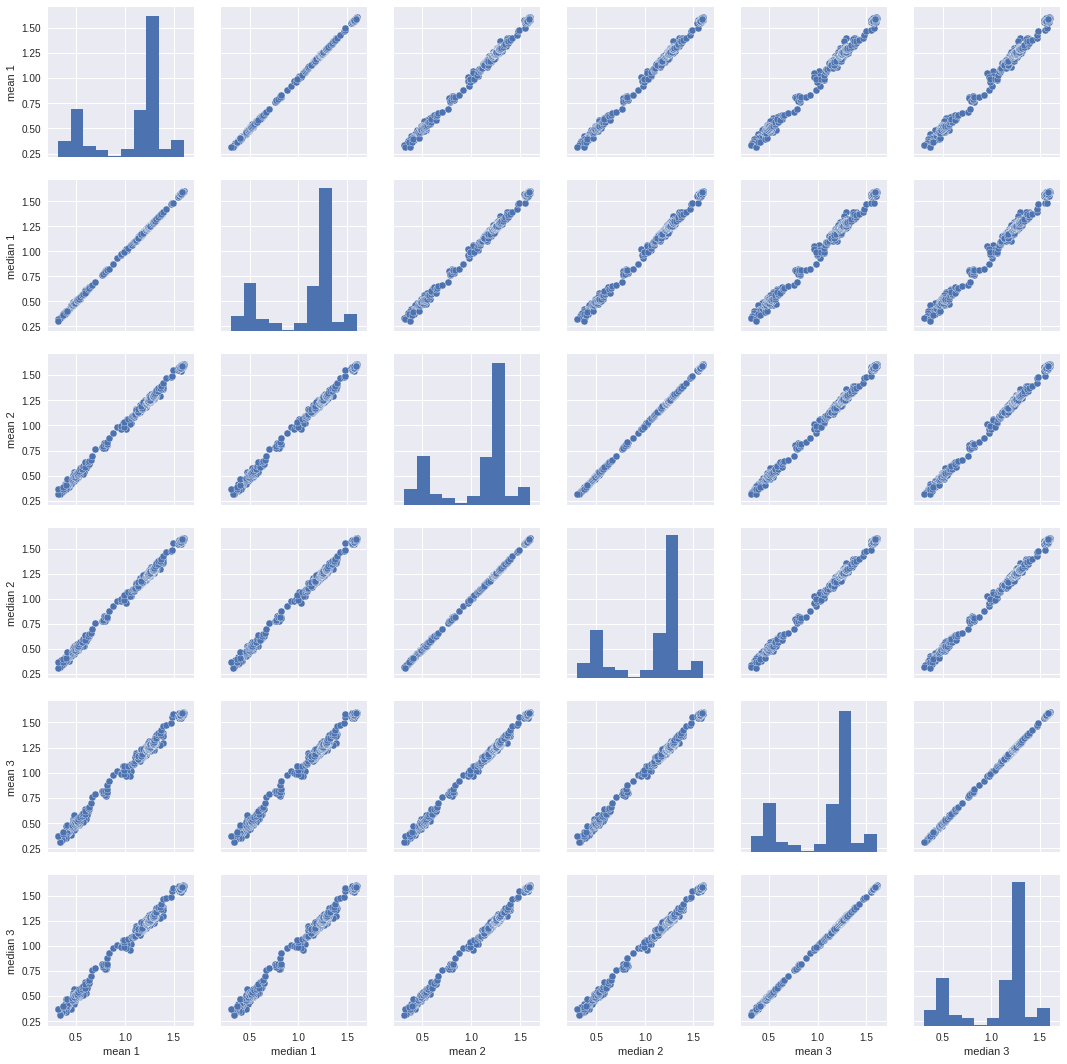

In [26]:
import seaborn as sns
sns.pairplot(trainx)

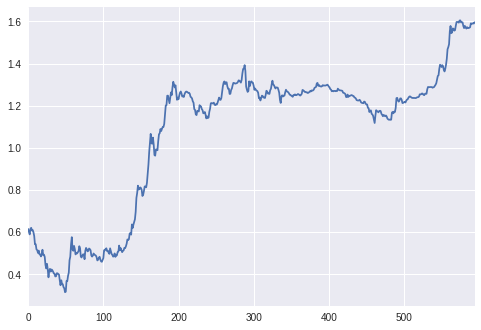

In [27]:
sns.tsplot(trainy['output_mean'])

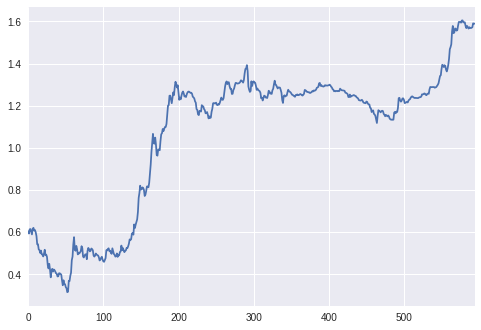

In [28]:
sns.tsplot(trainx['mean 1'])

# Conclusion

Linear Regression works so well on the window based method because
the last three mean values have enough information and are sufficient to predict the next value of mean.

For example, even during a price rise the model will fail only once when the price suddenly rises. After that the last three values will reflect a rise in price and hence the fourth value can be easily inferred.

The accuracy is really good because only the next mean value is to be predicted. It means that I tell someone the last three days' temperature and he has to predict the temperature of the fourth day. Since, daily temperatures follow a logical trend and do not fluctuate highly on a daily basis, the prediction is very simple and accurate.

A better challenge would be to see the last months' data and predict the upcoming week. 